# CS-556 Final Project

# Concrete Strength Prediction

#### Name : Shrey Shah, CWID : 20009523 

#### Name : Namra Sanjay Patel, CWID : 20011070

#### Name : Archi Dilip Patel, CWID : 20010946

In [1]:
import pandas as pd
import numpy as np
from numpy import sort
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Visualisation of data using below libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as sci

# Importing machine learning libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Feature extraction libraries
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")




In [2]:
df = pd.read_csv('concrete_strength.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data_copy1 = df
data_copy2 = df

In [7]:
def custom_summry(df):
    
    result = []         # Creating an empty list called result 
    
    # Iterating all the columns in the data for studying Descriptive stats
    
    for col in df.columns:
        stats = OrderedDict({"Feature Name":col,
                             'Count':df[col].count(),
                            'Minimum':df[col].min(),
                            'Quartile1':df[col].quantile(0.25),
                            'Mean':df[col].mean(),
                            'Median':df[col].median(),
                            'Quartile3':df[col].quantile(0.75),
                            'IQR':(df[col].quantile(0.75)-df[col].quantile(0.25)),
                            'Maximum':df[col].max(),
                            'Variance':df[col].var(),
                            'Standard Deviation':df[col].std(),
                            'Skewness':df[col].skew(),
                            'Kurtosis':df[col].kurt()})
        
        #custom comment for identifying skew 
        
        if df[col].skew()<-1:
            sk_label = 'highly Negatively Skewed'
        elif -1<= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= df[col].skew() <0:
            sk_label = 'Fairly Symmetric(-ve)'
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric(+ve)'
        elif 0.5 <= df[col].skew() <1:
            sk_label = 'Moderately Skewed (+ve)'
        elif df[col].skew() >1:
            sk_label = 'Higly (+ve) Skewed'
        else:
            sk_label = 'error'
        stats['Skeweness Comment'] = sk_label
        
        #custom comment for identifying Outliers
        
        uplim = stats['Quartile3'] + 1.5 * stats['IQR']
        lowlim = stats['Quartile1'] - 1.5 * stats['IQR']
        if len([x for x in df[col] if x < lowlim or x > uplim])> 0:
            outlier_comment = 'Has outlier'
        else:
            outlier_comment = 'No outlier'
            
        stats['outlier_comment']= outlier_comment
        
            
        result.append(stats)
    summary_df = pd.DataFrame(data=result)
    return summary_df

In [8]:
custom_summry(df)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,Cement,1030,102.00,192.375,281.167864,272.900,350.000,157.625,540.0,10921.580220,104.506364,0.509481,-0.520652,Moderately Skewed (+ve),No outlier
1,Blast Furnace Slag,1030,0.00,0.000,73.895825,22.000,142.950,142.950,359.4,7444.124812,86.279342,0.800717,-0.508175,Moderately Skewed (+ve),Has outlier
2,Fly Ash,1030,0.00,0.000,54.188350,0.000,118.300,118.300,200.1,4095.616541,63.997004,0.537354,-1.328746,Moderately Skewed (+ve),No outlier
3,Water,1030,121.80,164.900,181.567282,185.000,192.000,27.100,247.0,456.002651,21.354219,0.074628,0.122082,Fairly Symmetric(+ve),Has outlier
4,Superplasticizer,1030,0.00,0.000,6.204660,6.400,10.200,10.200,32.2,35.686781,5.973841,0.907203,1.411269,Moderately Skewed (+ve),Has outlier
5,Coarse Aggregate,1030,801.00,932.000,972.918932,968.000,1029.400,97.400,1145.0,6045.677357,77.753954,-0.040220,-0.599016,Fairly Symmetric(-ve),No outlier
6,Fine Aggregate,1030,594.00,730.950,773.580485,779.500,824.000,93.050,992.6,6428.187792,80.175980,-0.253010,-0.102177,Fairly Symmetric(-ve),Has outlier
7,Age,1030,1.00,7.000,45.662136,28.000,56.000,49.000,365.0,3990.437729,63.169912,3.269177,12.168989,Higly (+ve) Skewed,Has outlier
8,Strength,1030,2.33,23.710,35.817961,34.445,46.135,22.425,82.6,279.081814,16.705742,0.416977,-0.313725,Fairly Symmetric(+ve),Has outlier


In [9]:
# Building a function to treat outliers

def replace_outlier(data,col,method='quartile',strategy='median'):
    
    col_data = data[col]
    
    # Using method 1: Quartile
    if method == 'quartile':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        upper_imit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
        
    # Using method 2: Standard Deviation
    elif method == 'standard deviation':
        col_mean = data[col].mean()
        col_sdv = data[col].std()
        limit = 2*col_sdv 
        up_lim = col_mean + limit
        low_lim = col_mean -limit
        
        
    else :
        print('Pass a correct method')
    # Displaying the outliers
    outliers = data.loc[(col_data<lower_limit )|( col_data>upper_imit), col]
    outliers_percentage = round(len(outliers)/len(data),2)
    
    if len(outliers) == 0:
        print(f'The {col} has no outliers')
    else:
        print(f'The {col} has {len(outliers)} outliers')
        print('Outlier percentage:',outliers_percentage)
        print(f'The {col} has outlier values:',np.sort(np.array(outliers)))
        display(data.loc[(col_data<lower_limit) | (col_data>upper_imit), col])



# Replacing Outliers

# Using strategy 1 that is 'median'

    if strategy == 'median':
        data.loc[(col_data<lower_limit )|( col_data>upper_imit), col] = data[col].median()

# Using straegy 2 that is 'mean'

    elif strategy == 'mean':
            data.loc[(col_data<low_lim) |( col_data>up_lim,col)] = data[col].mean()

    else:
        print('Pass a correct strategy')


    return data


In [10]:
def ODT_plots(data,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (21,21))
    
    kwargs={'fontsize' :20, 'color':'black'} # kwargs for Common Arguments

    # Descriptive Stats
    sns.boxplot(data[col],ax = ax1,color='blue')
    ax1.set_title(col+' '+'boxplot',**kwargs)
    ax1.set_xlabel('Boxplot',**kwargs)
    ax1.set_ylabel('values',**kwargs)

   # plotting histogram with outliers
    sns.distplot(data[col],ax = ax2,color='red',fit = sci.norm)
    ax2.axvline(data[col].mean(),color = 'green')
    ax2.axvline(data[col].median(),color = 'blue')
    ax2.set_title(col+' '+'Histogram with outliers ',**kwargs)
    ax2.set_xlabel('density',**kwargs)
    ax2.set_ylabel('values',**kwargs)
    
    # plotting histogram without outliers
    # Using function
    y = replace_outlier(data,col)
    sns.distplot(y[col],ax=ax3,color='red',fit=sci.norm)
    ax3.axvline(y[col].mean(),color = 'green')
    ax3.axvline(y[col].median(),color = 'blue')
    ax3.set_title(col+' '+'Histogram without outliers',**kwargs)
    ax3.set_xlabel('density',**kwargs)
    ax3.set_ylabel('values',**kwargs)
    
    plt.show()

The Cement has no outliers


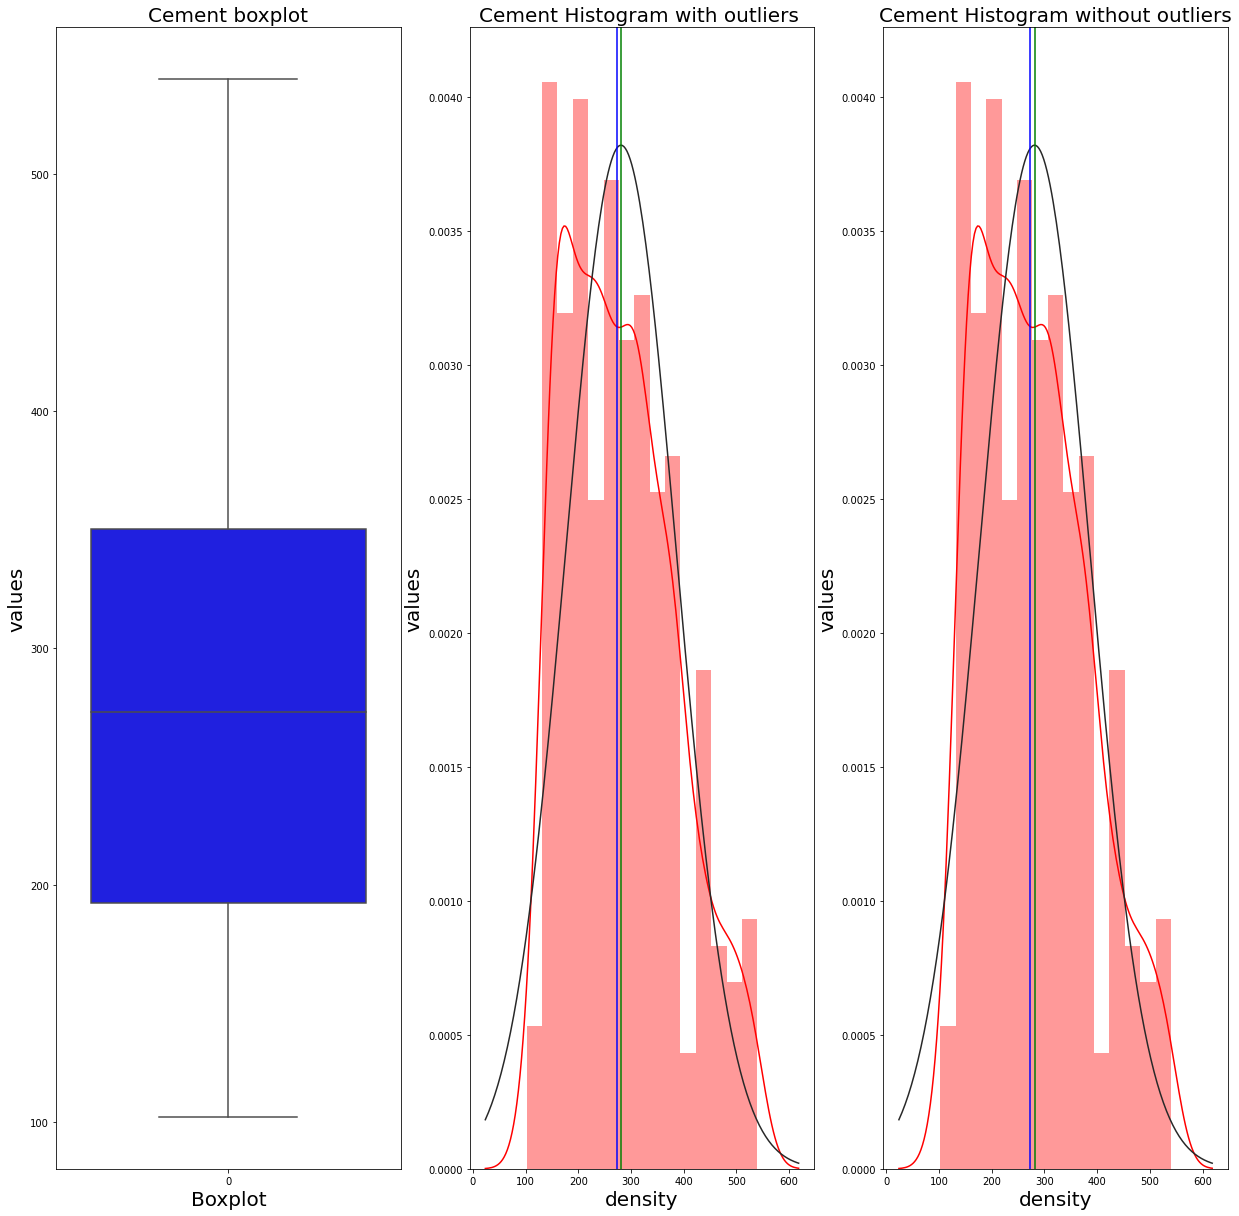

The Blast Furnace Slag has 2 outliers
Outlier percentage: 0.0
The Blast Furnace Slag has outlier values: [359.4 359.4]


553    359.4
559    359.4
Name: Blast Furnace Slag, dtype: float64

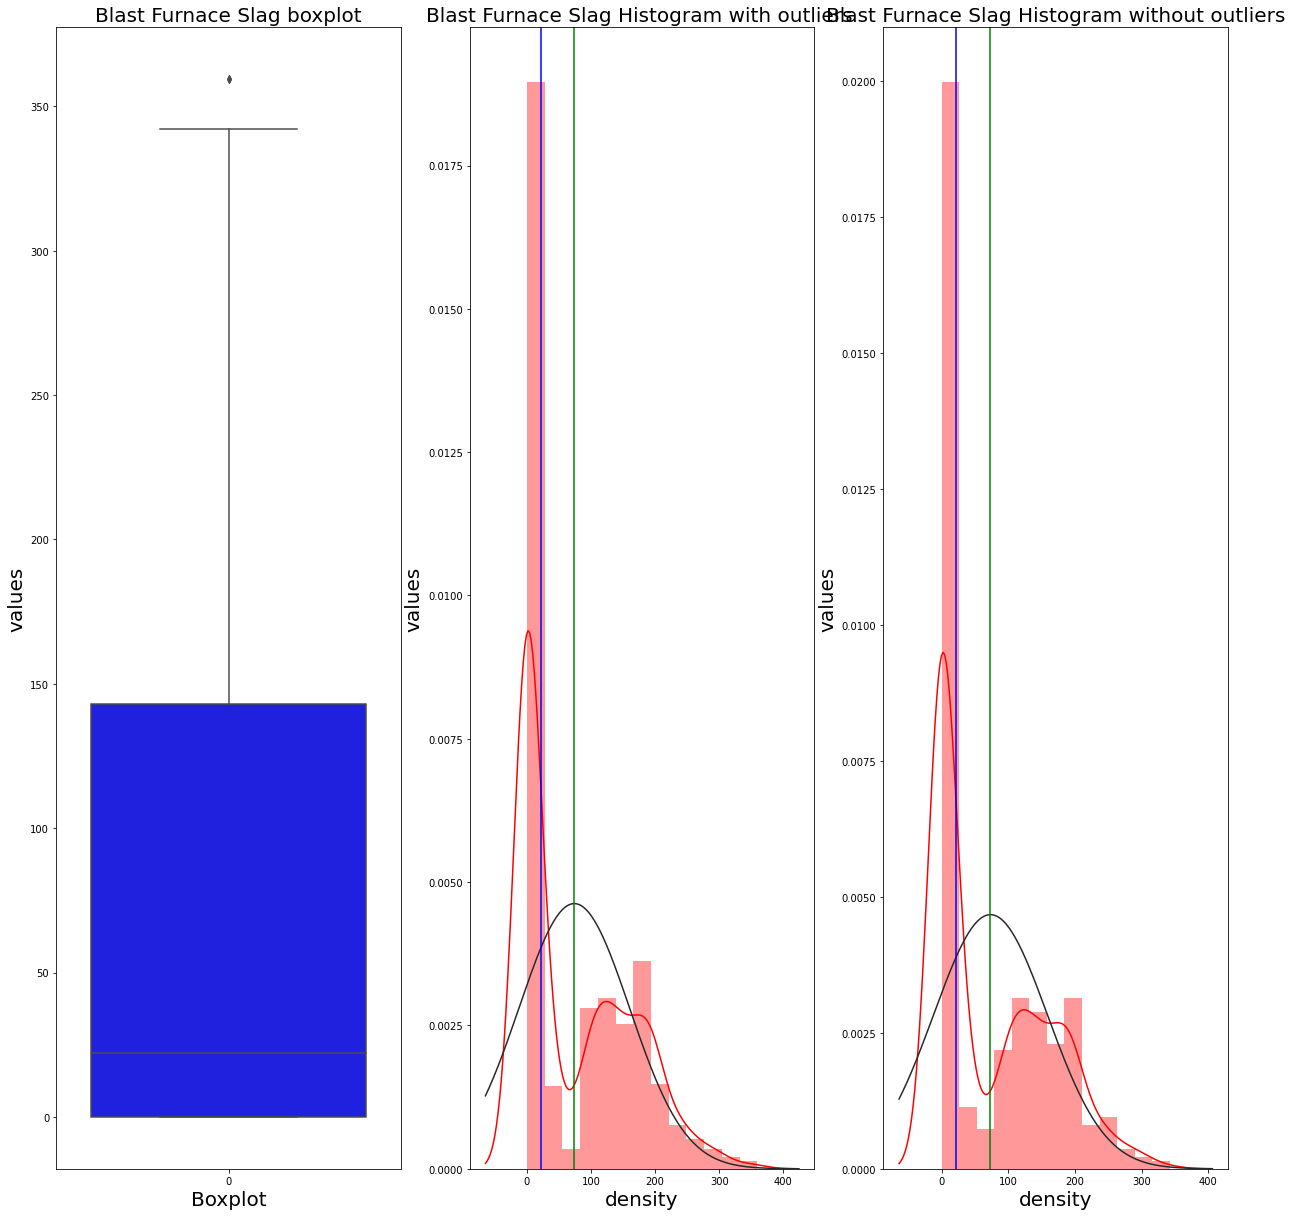

The Fly Ash has no outliers


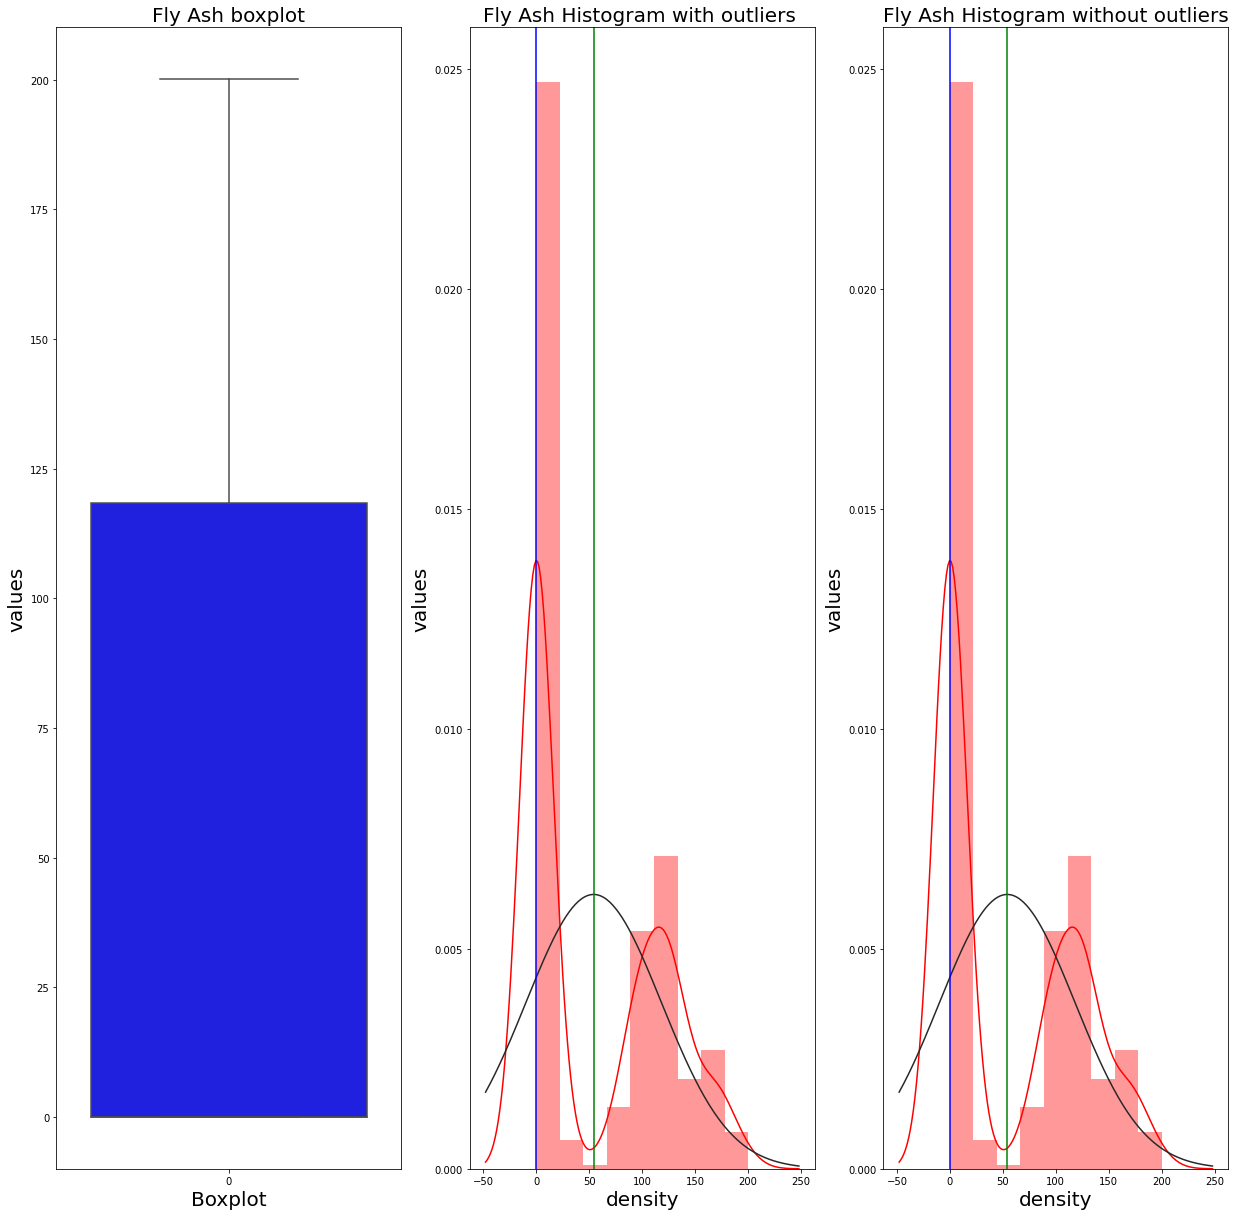

The Water has 9 outliers
Outlier percentage: 0.01
The Water has outlier values: [121.8 121.8 121.8 121.8 121.8 236.7 237.  246.9 247. ]


224     121.8
225     121.8
226     121.8
227     121.8
228     121.8
862     237.0
873     247.0
936     246.9
1019    236.7
Name: Water, dtype: float64

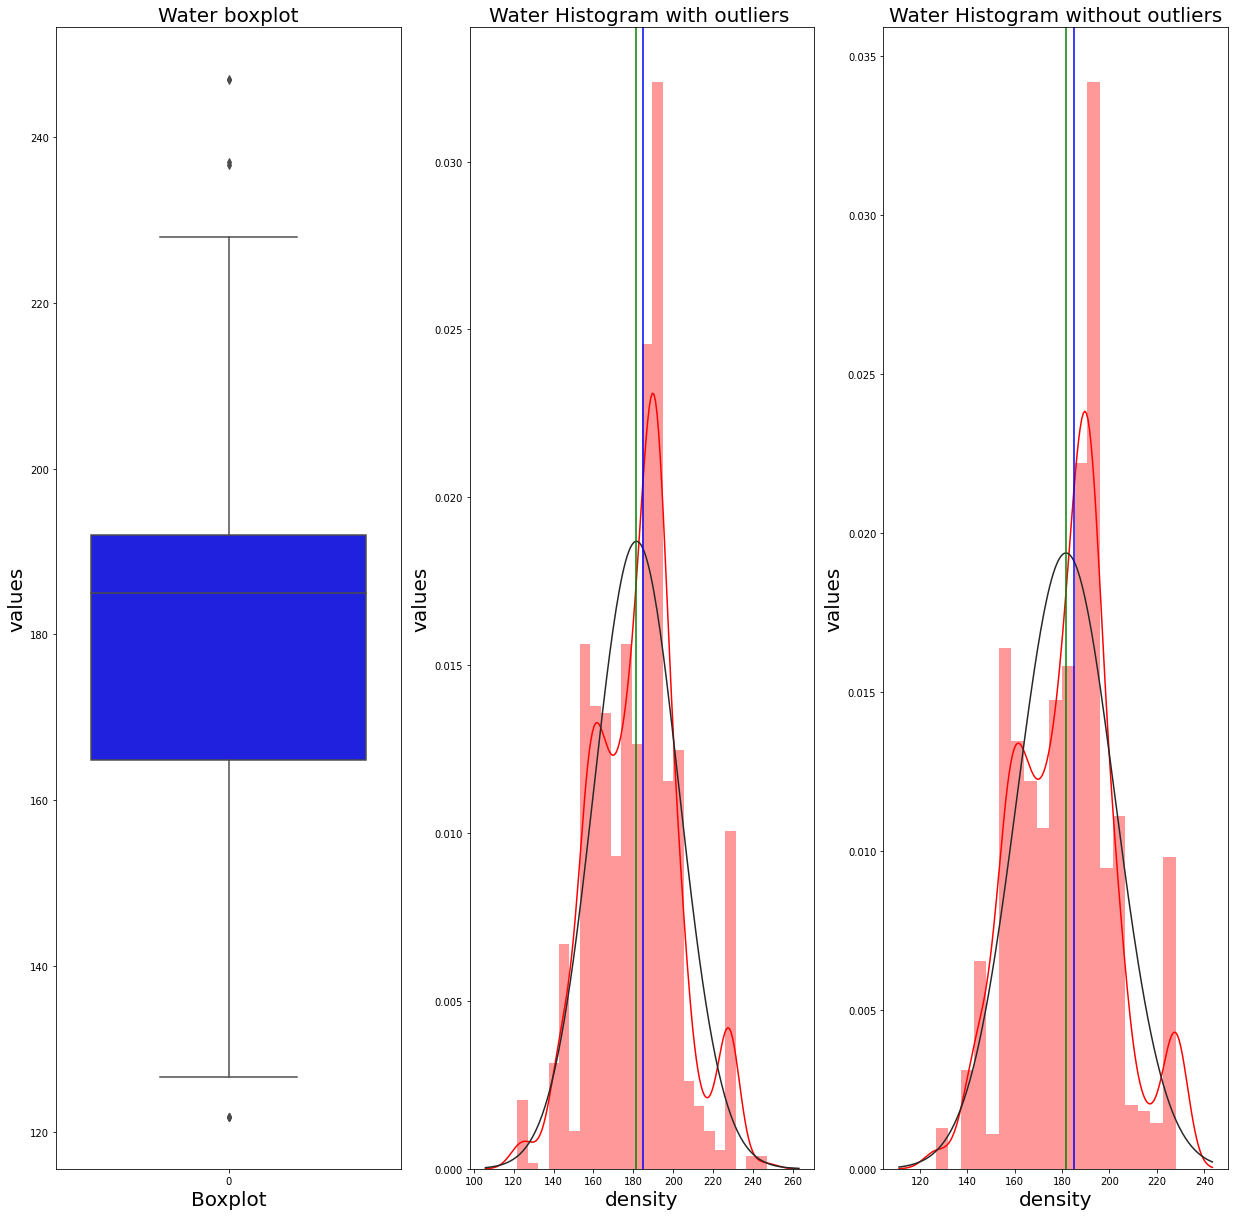

The Superplasticizer has 10 outliers
Outlier percentage: 0.01
The Superplasticizer has outlier values: [28.2 28.2 28.2 28.2 28.2 32.2 32.2 32.2 32.2 32.2]


76     32.2
79     28.2
99     32.2
102    28.2
122    32.2
125    28.2
145    32.2
148    28.2
168    32.2
171    28.2
Name: Superplasticizer, dtype: float64

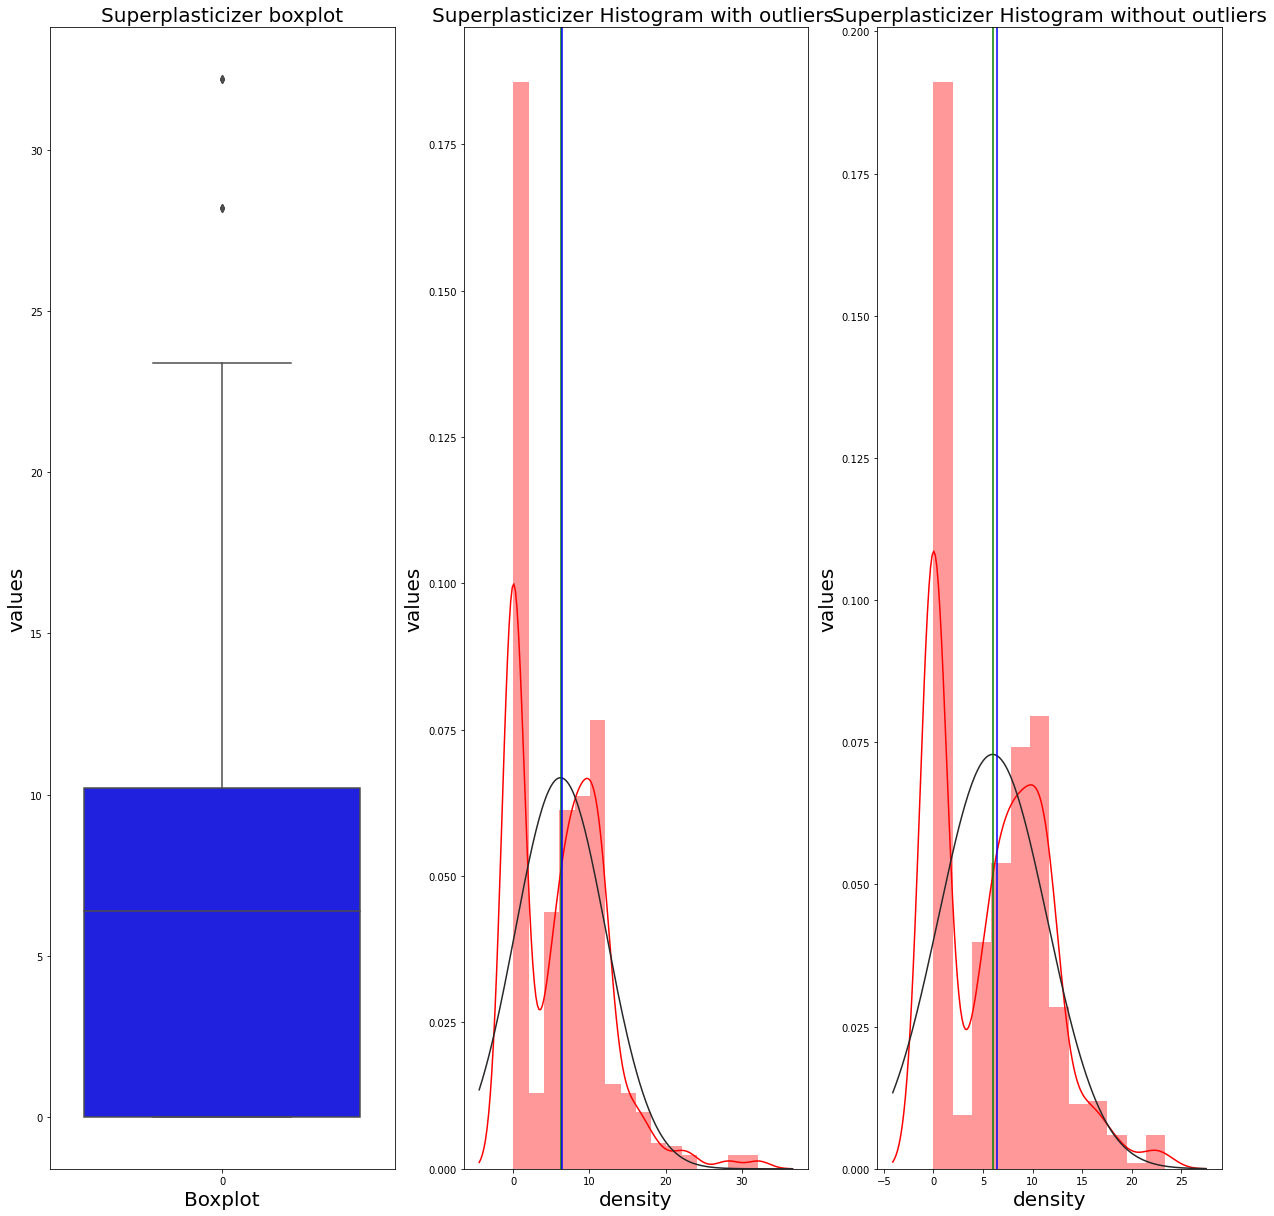

The Coarse Aggregate has no outliers


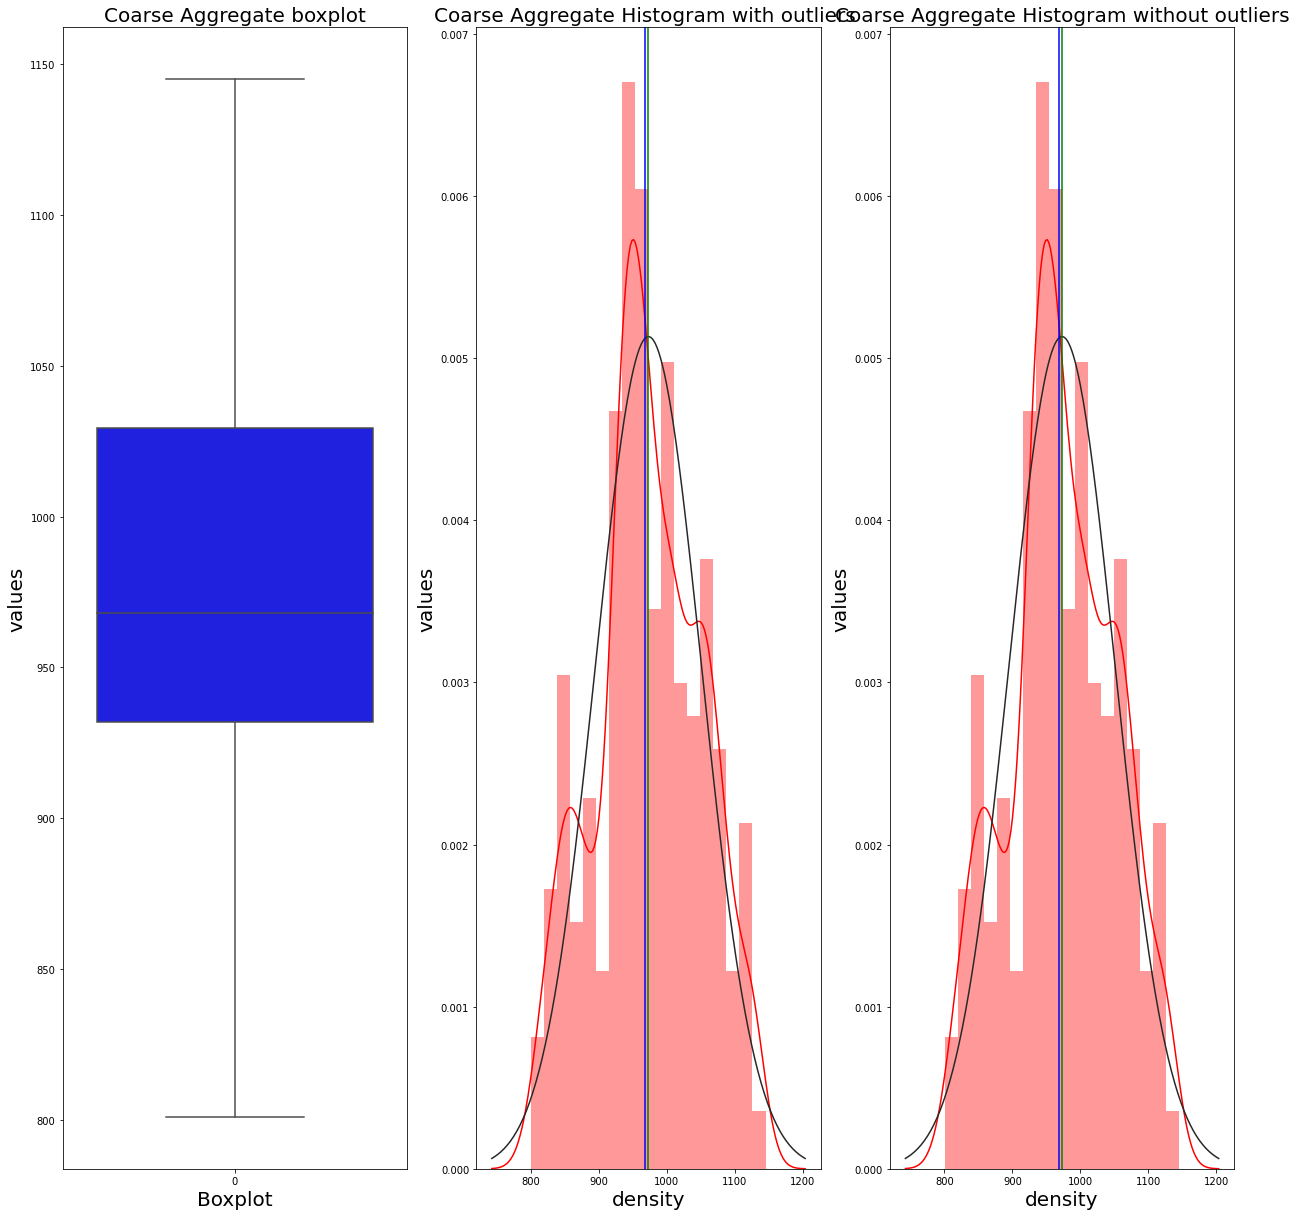

The Fine Aggregate has 5 outliers
Outlier percentage: 0.0
The Fine Aggregate has outlier values: [992.6 992.6 992.6 992.6 992.6]


74     992.6
97     992.6
120    992.6
143    992.6
166    992.6
Name: Fine Aggregate, dtype: float64

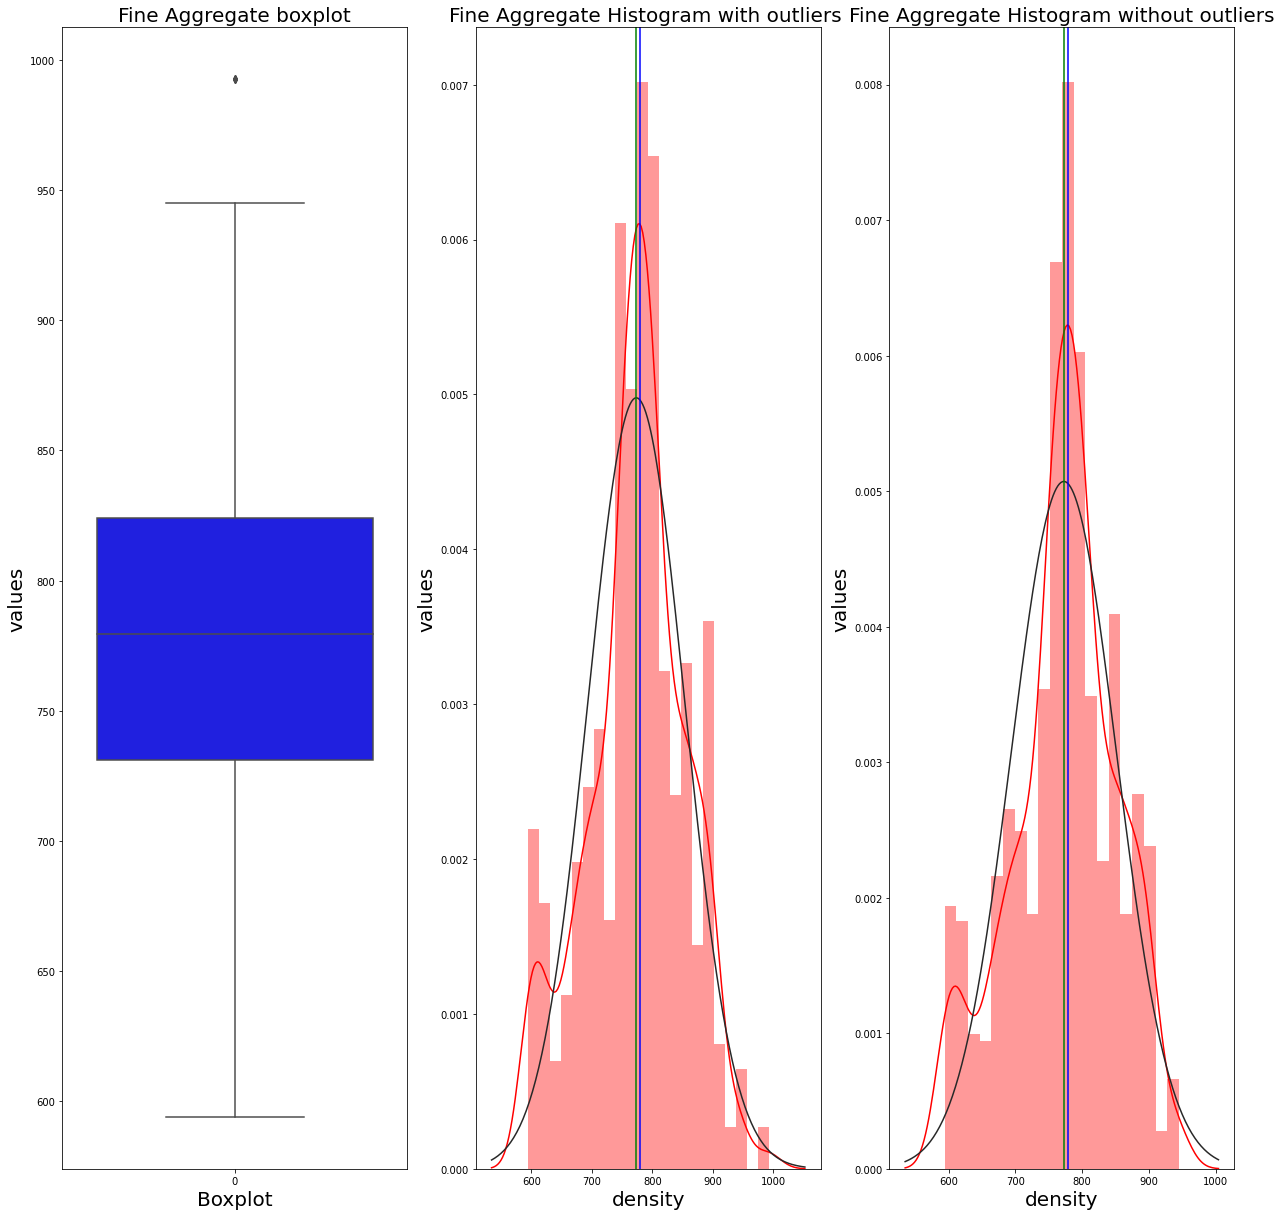

The Age has 59 outliers
Outlier percentage: 0.06
The Age has outlier values: [180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 270 270 270 270 270 270 270 270 270 270
 270 270 270 360 360 360 360 360 360 365 365 365 365 365 365 365 365 365
 365 365 365 365 365]


2      270
3      365
4      360
6      365
12     270
17     365
19     180
20     180
23     180
24     365
25     270
26     270
27     180
30     365
31     365
32     180
33     270
34     365
35     270
39     180
41     365
42     365
43     180
47     180
50     180
51     180
56     365
58     180
60     270
61     270
63     270
64     180
65     270
66     360
603    180
604    365
609    180
610    365
615    180
616    360
619    180
620    365
621    180
622    365
755    180
756    270
762    180
768    180
769    360
791    180
792    360
794    180
795    180
797    180
798    270
813    180
814    360
820    270
823    180
Name: Age, dtype: int64

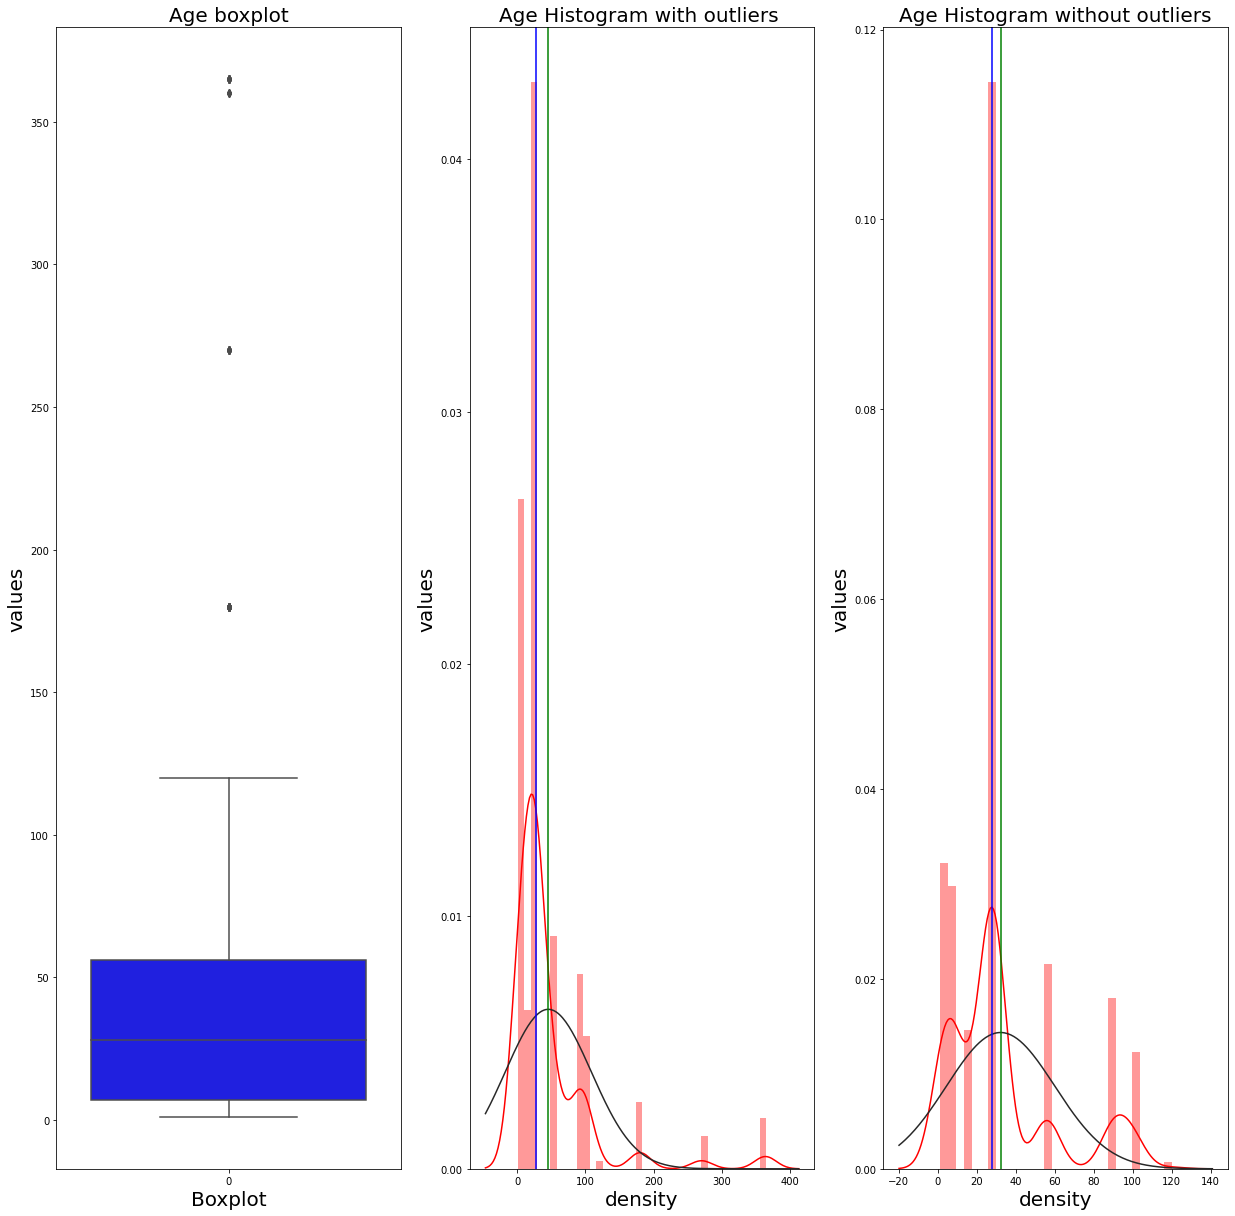

The Strength has 4 outliers
Outlier percentage: 0.0
The Strength has outlier values: [79.99 80.2  81.75 82.6 ]


0      79.99
153    80.20
181    82.60
381    81.75
Name: Strength, dtype: float64

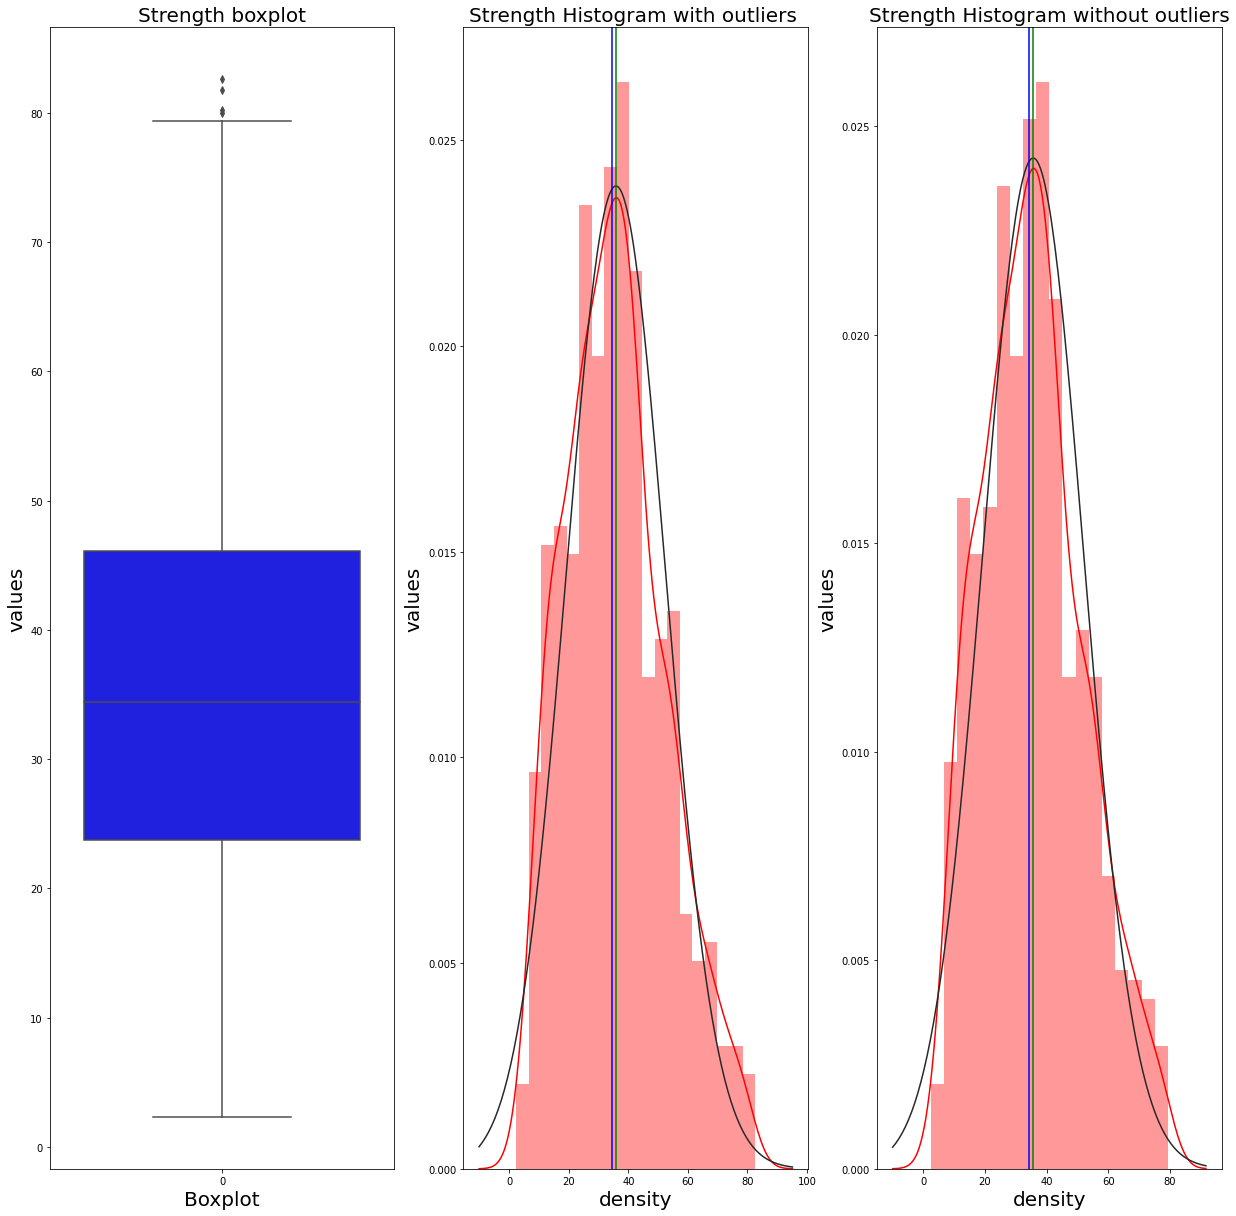

In [11]:
for x in df: 
    ODT_plots(df,x)

In [12]:
custom_summry(df)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,Cement,1030,102.00,192.375,281.167864,272.9000,350.0000,157.6250,540.0,10921.580220,104.506364,0.509481,-0.520652,Moderately Skewed (+ve),No outlier
1,Blast Furnace Slag,1030,0.00,0.000,73.240680,22.0000,142.7250,142.7250,342.1,7290.498956,85.384419,0.775981,-0.622249,Moderately Skewed (+ve),No outlier
2,Fly Ash,1030,0.00,0.000,54.188350,0.0000,118.3000,118.3000,200.1,4095.616541,63.997004,0.537354,-1.328746,Moderately Skewed (+ve),No outlier
3,Water,1030,126.60,164.900,181.653107,185.0000,192.0000,27.1000,228.0,424.492075,20.603205,0.089598,-0.043163,Fairly Symmetric(+ve),No outlier
4,Superplasticizer,1030,0.00,0.000,5.973592,6.4000,10.0750,10.0750,23.4,29.999341,5.477165,0.468146,-0.436435,Fairly Symmetric(+ve),No outlier
5,Coarse Aggregate,1030,801.00,932.000,972.918932,968.0000,1029.4000,97.4000,1145.0,6045.677357,77.753954,-0.040220,-0.599016,Fairly Symmetric(-ve),No outlier
6,Fine Aggregate,1030,594.00,730.950,772.546019,779.4000,822.2000,91.2500,945.0,6194.198716,78.703232,-0.332890,-0.190168,Fairly Symmetric(-ve),Has outlier
7,Age,1030,1.00,7.000,32.256311,28.0000,28.0000,21.0000,120.0,773.046000,27.803705,1.286884,0.790401,Higly (+ve) Skewed,Has outlier
8,Strength,1030,2.33,23.710,35.636641,34.4225,45.8075,22.0975,79.4,271.068628,16.464162,0.387347,-0.360829,Fairly Symmetric(+ve),Has outlier


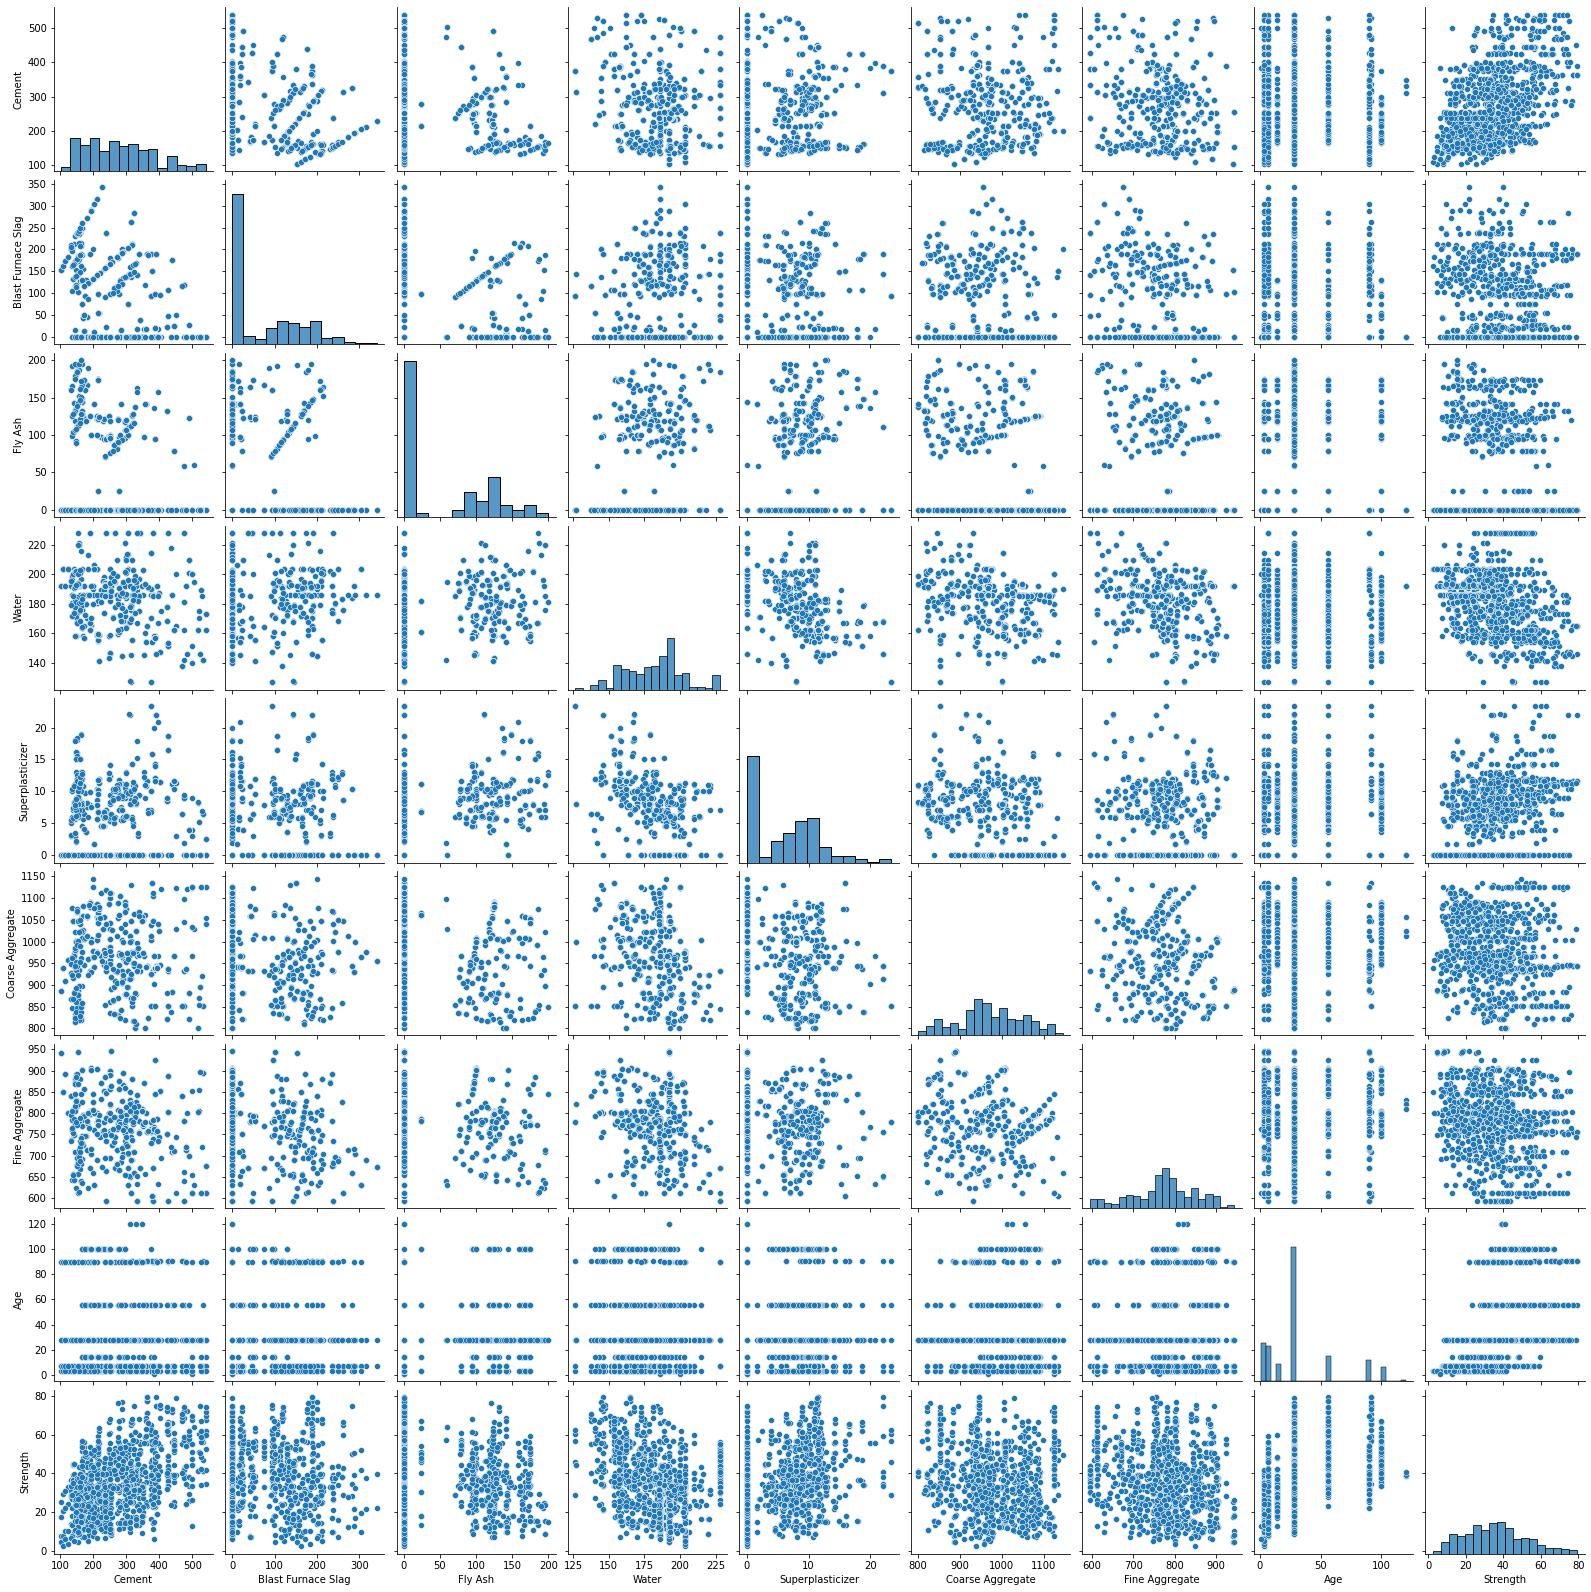

In [13]:
sns.pairplot(df)

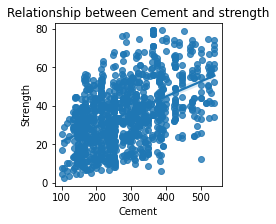

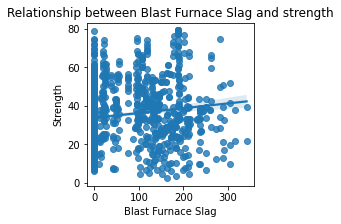

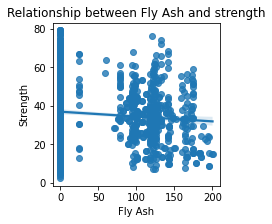

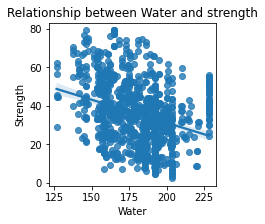

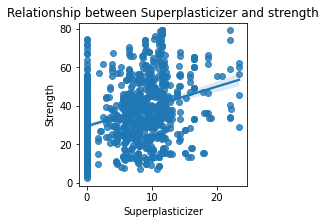

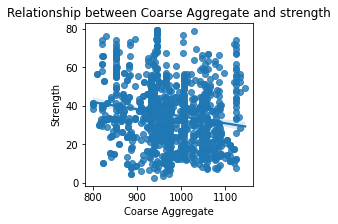

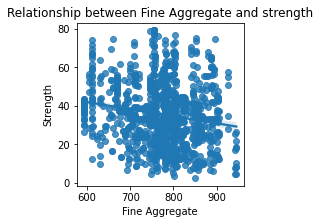

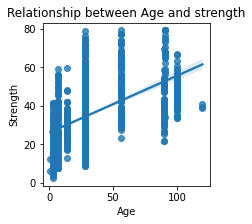

In [14]:
# Multi variate analysis using regression plots
for col in df.columns:
    if col != 'Strength':
        f,ax1 = plt.subplots(figsize=(3,3))
        sns.regplot(x=df[col],y=df['Strength'],ax=ax1).set_title(f'Relationship between {col} and strength')
        

<AxesSubplot: >

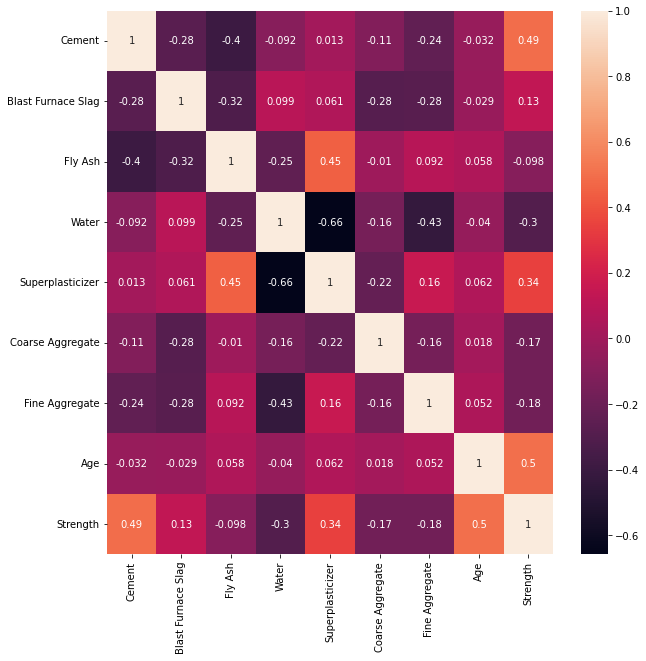

In [15]:
# Plotting Heat Maps

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
# Correlation of each variable with the target

def corr_with_target(data,tcol):
    ind_var = data.drop([tcol],axis=1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(data[tcol].corr(data[col]))
    result = pd.DataFrame([ind_var,corr_result],index=['Variables','Correlation']).T.sort_values('Correlation',ascending=False)
    return(result)

In [17]:
corr_with_target(df,'Strength')

,Variables,Correlation
7,Age,0.499711
0,Cement,0.493518
4,Superplasticizer,0.342633
1,Blast Furnace Slag,0.129561
2,Fly Ash,-0.097973
5,Coarse Aggregate,-0.173234
6,Fine Aggregate,-0.176113
3,Water,-0.300043


In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [19]:
features = ['Cement', 'Blast Furnace Slag', 'Fly Ash']
X = df[features]
y = df['Strength']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Linear Regression Model

In [21]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 160.3982311788629


In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [24]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = LinearRegression() # or SVM()
model_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

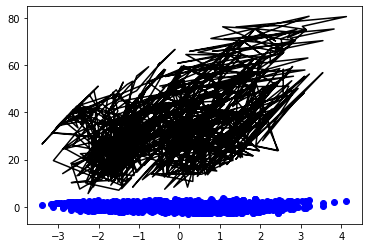

In [25]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.plot(X_pca[:, 0], model_pca.predict(X_pca), c='black')
plt.show()

In [26]:
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("Mean Square Error:", mse_pca)

Mean Square Error: 36.19734795059569


In [27]:
if mse < mse_pca:
    print("The original model performed better with a mean square error of", mse)
else:
    print("The PCA model performed better with a mean square error of", mse_pca)

The PCA model performed better with a mean square error of 36.19734795059569


In [28]:
prediction = pd.DataFrame(y_pred, columns=['linear_Regression']).to_csv('prediction.csv',index=False)
prediction_pca = pd.DataFrame(y_pred_pca, columns=['linear_Regression']).to_csv('prediction_pca.csv',index=False)

# SVM model

In [29]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [30]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)



Mean Square Error: 169.45023251653237


In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [32]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = SVR()
model_pca.fit(X_train_pca, y_train_pca)

SVR()

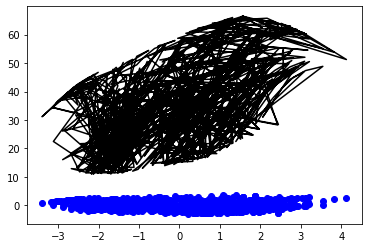

In [33]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.plot(X_pca[:, 0], model_pca.predict(X_pca), c='black')
plt.show()


In [34]:
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("Mean Square Error:",mse_pca)

Mean Square Error: 36.85405456647902


In [35]:
if mse < mse_pca:
    print("The model trained on the original features performed better with a MSE of", mse)
else:
    print("The model trained on the PCA-transformed features performed better with a MSE of", mse_pca)

The model trained on the PCA-transformed features performed better with a MSE of 36.85405456647902


In [36]:
df = pd.read_csv('prediction.csv')
prediction = pd.DataFrame(y_pred, columns=['predictions'])
df['SVM'] = prediction
df.to_csv('prediction.csv',index=False)

In [37]:
df_pca = pd.read_csv('prediction_pca.csv')
prediction = pd.DataFrame(y_pred_pca, columns=['predictions'])
df_pca['SVM'] = prediction
df.to_csv('prediction_pca.csv',index=False)

# using Lasso model

In [38]:
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [39]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 160.45366345419865


In [40]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [41]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = Lasso()
model_pca.fit(X_train_pca, y_train_pca)

Lasso()

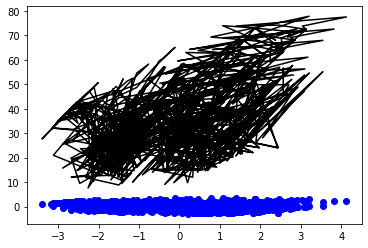

In [42]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.plot(X_pca[:, 0], model_pca.predict(X_pca), c='black')
plt.show()

In [43]:
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("Mean Square Error (PCA-Transformed Features):",mse_pca)

Mean Square Error (PCA-Transformed Features): 38.04393888798579


In [44]:
if mse < mse_pca:
    print("The model trained on the original features performed better with a MSE of", mse)
else:
    print("The model trained on the PCA-transformed features performed better with a MSE of", mse_pca)

The model trained on the PCA-transformed features performed better with a MSE of 38.04393888798579


In [45]:
df = pd.read_csv('prediction.csv')
prediction = pd.DataFrame(y_pred, columns=['predictions'])
df['Lasso'] = prediction
df.to_csv('prediction.csv',index=False)

In [46]:
df_pca = pd.read_csv('prediction_pca.csv')
prediction = pd.DataFrame(y_pred_pca, columns=['predictions'])
df_pca['Lasso'] = prediction
df.to_csv('prediction_pca.csv',index=False)


# Using Ridge model

In [47]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [48]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 160.39823688716115


In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [50]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = Ridge()
model_pca.fit(X_train_pca, y_train_pca)

Ridge()

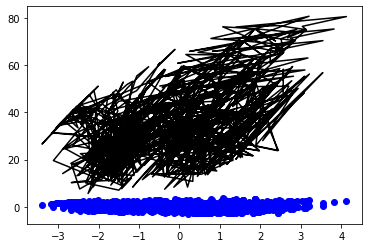

In [51]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.plot(X_pca[:, 0], model_pca.predict(X_pca), c='black')
plt.show()

In [52]:
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("Mean Square Error (PCA-Transformed Features):",mse_pca)

Mean Square Error (PCA-Transformed Features): 36.204831577533234


In [53]:
if mse < mse_pca:
    print("The model trained on the original features performed better with a MSE of", mse)
else:
    print("The model trained on the PCA-transformed features performed better with a MSE of", mse_pca)

The model trained on the PCA-transformed features performed better with a MSE of 36.204831577533234


In [54]:
df = pd.read_csv('prediction.csv')
prediction = pd.DataFrame(y_pred, columns=['predictions'])
df['Ridge'] = prediction
df.to_csv('prediction.csv',index=False)

In [55]:
df_pca = pd.read_csv('prediction_pca.csv')
prediction = pd.DataFrame(y_pred_pca, columns=['predictions'])
df_pca['Ridge'] = prediction
df.to_csv('prediction_pca.csv',index=False)

# KNN model

In [56]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [57]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 164.59327934466023


In [58]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [59]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = KNeighborsRegressor(n_neighbors=5)
model_pca.fit(X_train_pca, y_train_pca)

KNeighborsRegressor()

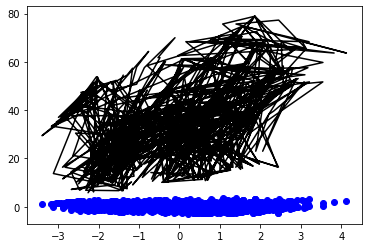

In [60]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.plot(X_pca[:, 0], model_pca.predict(X_pca), c='black')
plt.show()

In [61]:
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("Mean Square Error:",mse_pca)

Mean Square Error: 29.032606985436892


In [62]:
if mse < mse_pca:
    print("The model trained on the original features performed better with a MSE of", mse)
else:
    print("The model trained on the PCA-transformed features performed better with a MSE of", mse_pca)

The model trained on the PCA-transformed features performed better with a MSE of 29.032606985436892


In [63]:
df = pd.read_csv('prediction.csv')
prediction = pd.DataFrame(y_pred, columns=['predictions'])
df['KNN'] = prediction
df.to_csv('prediction.csv',index=False)

In [64]:
df_pca = pd.read_csv('prediction_pca.csv')
prediction = pd.DataFrame(y_pred_pca, columns=['predictions'])
df_pca['KNN'] = prediction
df.to_csv('prediction_pca.csv',index=False)

# Using Decision Tree

In [65]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [66]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 167.28523619926773


In [67]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [68]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = DecisionTreeRegressor()
model_pca.fit(X_train_pca, y_train_pca)

DecisionTreeRegressor()

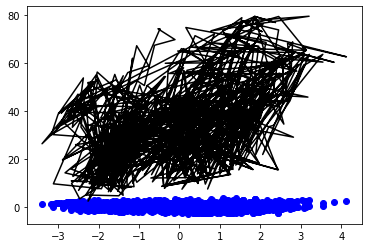

In [69]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.plot(X_pca[:, 0], model_pca.predict(X_pca), c='black')
plt.show()

In [70]:
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("Mean Square Error :",mse_pca)

Mean Square Error : 49.39997609223301


In [71]:
if mse < mse_pca:
    print("The model trained on the original features performed better with a MSE of", mse)
else:
    print("The model trained on the PCA-transformed features performed better with a MSE of", mse_pca)

The model trained on the PCA-transformed features performed better with a MSE of 49.39997609223301


In [72]:
df = pd.read_csv('prediction.csv')
prediction = pd.DataFrame(y_pred, columns=['predictions'])
df['Decision Tree'] = prediction
df.to_csv('prediction.csv',index=False)

In [73]:
df_pca = pd.read_csv('prediction_pca.csv')
prediction = pd.DataFrame(y_pred_pca, columns=['predictions'])
df_pca['Decision Tree'] = prediction
df.to_csv('prediction_pca.csv',index=False)

# Using Random forest

In [74]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 161.96609286579394


In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [77]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = RandomForestRegressor()
model_pca.fit(X_train_pca, y_train_pca)

RandomForestRegressor()

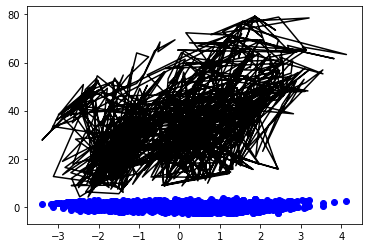

In [78]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.plot(X_pca[:, 0], model_pca.predict(X_pca), c='black')
plt.show()

In [79]:
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("Mean Square Error :",mse_pca)

Mean Square Error : 27.259324396905303


In [80]:
if mse < mse_pca:
    print("The model trained on the original features performed better with a MSE of", mse)
else:
    print("The model trained on the PCA-transformed features performed better with a MSE of", mse_pca)

The model trained on the PCA-transformed features performed better with a MSE of 27.259324396905303


In [81]:
df = pd.read_csv('prediction.csv')
prediction = pd.DataFrame(y_pred, columns=['predictions'])
df['Random forest'] = prediction
df.to_csv('prediction.csv',index=False)

In [82]:
df_pca = pd.read_csv('prediction_pca.csv')
prediction = pd.DataFrame(y_pred_pca, columns=['predictions'])
df_pca['Random forest'] = prediction
df.to_csv('prediction_pca.csv',index=False)